In [ ]:
!pip install scikit_posthocs

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install pingouin

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 185 kB 6.8 MB/s 
     |████████████████████████████████| 9.8 MB 46.5 MB/s 
  Created wheel for pingouin: filename=pingouin-0.5.2-py3-none-any.whl size=196206 sha256=8e1638dcb0dda6b754fb1c0cb989fb8fc70fc73bdb122893990431703e0b4f0f
  Stored in directory: /root/.cache/pip/wheels/11/5a/63/a6d32fc26fa462c731f65480bfb98ff7bd39b8ebcb4bc6c2fe
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7048 sha256=7e8635205d1eacee580f19f24a506bd2ec39c76840b70102f487c9ec11a8c0a3
  Stored in directory: /root/.cache/pip/wheels/d6/64/cd/32819b511a488e4993f2fab909a95330289c3f4e0f6ef4676d
Successfully built pingouin littleutils
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
import pandas as pd
import numpy as np
from statsmodels.stats.anova import AnovaRM
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as mno
import math
import scipy
import pingouin as pg
import scikit_posthocs as sp

from google.colab import files

from sklearn import linear_model
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [31]:
LevodopaChallengeWide = pd.read_csv('LevodopaChallengeWide.csv', sep = ';')

In [9]:
LevodopaChallengeWide

,patient,1,2,3,4,5,6,7,8,9,...,271,272,273,274,275,276,277,278,279,280
0,A1,0.611469,114.268519,0.523822,0.302693,1.042680,0.650821,0.124466,0.731670,0.311011,...,0.059352,0.286876,0.043708,0.106911,0.056958,0.019985,0.000773,0.440509,0.017174,0.034967
1,B2,0.518247,92.621999,0.616190,0.365236,1.298505,0.757749,0.192545,0.939427,0.359078,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,C3,0.717643,120.639756,0.508088,0.337158,0.989035,0.726702,0.136771,0.662393,0.326642,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,D4,0.706150,103.419973,0.557258,0.367137,1.160833,0.842990,0.184698,0.766362,0.394471,...,0.041001,0.240066,0.163996,0.175425,0.218589,0.133066,0.020699,0.257111,0.075236,0.146961
4,E5,0.502049,87.989886,0.540385,0.280149,1.236000,0.588038,0.164062,0.866156,0.369844,...,0.034107,0.354927,0.051930,0.249345,0.265119,0.036985,0.010152,0.283840,0.045063,0.082108
5,F6,0.967739,123.837209,0.474306,0.480193,0.966250,1.019113,0.117861,0.665518,0.300732,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,G7,0.442184,98.831386,0.609459,0.266526,1.229825,0.630156,0.119232,0.866156,0.371236,...,0.048612,0.197462,0.017677,0.138115,0.075831,0.018236,0.028362,0.231541,0.021156,0.046823
7,H8,0.748788,114.186851,0.525962,0.356121,1.052660,0.842926,0.146917,0.665518,0.350597,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,I9,0.578984,109.505703,0.551923,0.295549,1.086364,0.633942,0.219333,0.742149,0.344215,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,J10,0.478769,142.934004,0.412377,0.197330,0.845076,0.403777,0.148787,0.607867,0.237209,...,0.103208,0.384080,0.086576,0.090531,0.140019,0.028377,0.030936,0.145172,0.006111,0.010813


In [10]:
LevodopaChallengeWide.dtypes

patient     object
1          float64
2          float64
3          float64
4          float64
            ...   
276        float64
277        float64
278        float64
279        float64
280        float64
Length: 281, dtype: object

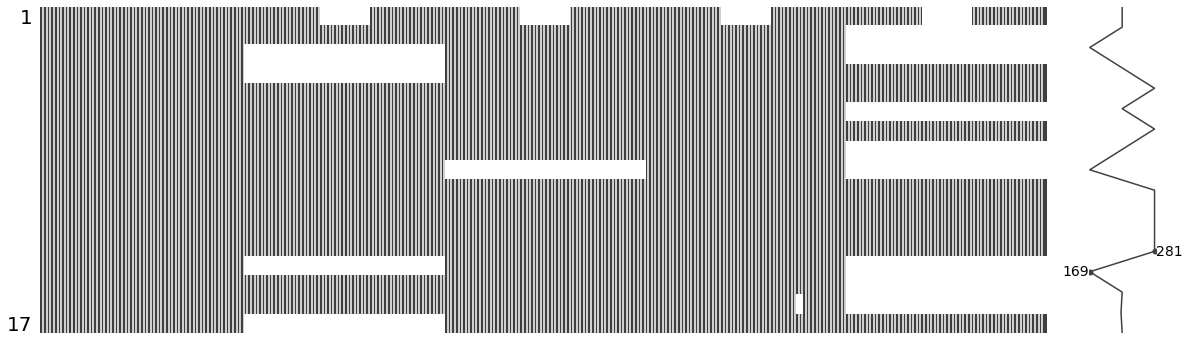

In [11]:
mno.matrix(LevodopaChallengeWide,figsize = (20,6))

In [12]:
# Remove patient index

patid_LevodopaChallengeWide = LevodopaChallengeWide.iloc[:,0:1]

In [13]:
# Select remianing, numeric variables

LevodopaChallengeWide = LevodopaChallengeWide.iloc[:,1:282]

In [14]:
LevodopaChallengeWide

,1,2,3,4,5,6,7,8,9,10,...,271,272,273,274,275,276,277,278,279,280
0,0.611469,114.268519,0.523822,0.302693,1.042680,0.650821,0.124466,0.731670,0.311011,0.399191,...,0.059352,0.286876,0.043708,0.106911,0.056958,0.019985,0.000773,0.440509,0.017174,0.034967
1,0.518247,92.621999,0.616190,0.365236,1.298505,0.757749,0.192545,0.939427,0.359078,0.515325,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.717643,120.639756,0.508088,0.337158,0.989035,0.726702,0.136771,0.662393,0.326642,0.349257,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.706150,103.419973,0.557258,0.367137,1.160833,0.842990,0.184698,0.766362,0.394471,0.392701,...,0.041001,0.240066,0.163996,0.175425,0.218589,0.133066,0.020699,0.257111,0.075236,0.146961
4,0.502049,87.989886,0.540385,0.280149,1.236000,0.588038,0.164062,0.866156,0.369844,0.432020,...,0.034107,0.354927,0.051930,0.249345,0.265119,0.036985,0.010152,0.283840,0.045063,0.082108
5,0.967739,123.837209,0.474306,0.480193,0.966250,1.019113,0.117861,0.665518,0.300732,0.313802,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,0.442184,98.831386,0.609459,0.266526,1.229825,0.630156,0.119232,0.866156,0.371236,0.492077,...,0.048612,0.197462,0.017677,0.138115,0.075831,0.018236,0.028362,0.231541,0.021156,0.046823
7,0.748788,114.186851,0.525962,0.356121,1.052660,0.842926,0.146917,0.665518,0.350597,0.345047,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,0.578984,109.505703,0.551923,0.295549,1.086364,0.633942,0.219333,0.742149,0.344215,0.402816,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,0.478769,142.934004,0.412377,0.197330,0.845076,0.403777,0.148787,0.607867,0.237209,0.343252,...,0.103208,0.384080,0.086576,0.090531,0.140019,0.028377,0.030936,0.145172,0.006111,0.010813


In [33]:
output_wide = list(output_wide)
output_wide

['patient',
 'Speed (m/s)',
 'Cadence (steps/min)',
 'Step Time - worst side (s)2',
 'Step Length - worst side (m)2',
 'Stride Time (s)',
 'Stride Length (m)',
 'Step Width (m)',
 'Stance Time - worst time t (s)2',
 'Swing Time - worst side (s)2',
 'Double Support Time (s)',
 'Single Support Time - worst side',
 'hip_flexion_rom_worstside',
 'hip_adduction_rom_worstside',
 'hip_rotation_rom_worstside',
 'knee_angle_rom_worstside',
 'ankle_angle_rom_worstside',
 'hip_flexion_mean_vel_worstside',
 'hip_adduction_mean_vel_worstside',
 'hip_rotation_mean_vel_worstside',
 'knee_angle_r_mean_vel_worstside',
 'ankle_angle_mean_vel_worstside',
 'arm_flex_rom_worstside',
 'arm_add_rom_worstside',
 'elbow_flex_rom_worstside',
 'arm_rot_rom_worstside',
 'pro_sup_rom_worstside',
 'wrist_flex_rom_worstside',
 'wrist_dev_rom_worstside',
 'arm_flex_mean_vel_worstside',
 'arm_add_mean_vel_worstside',
 'arm_rot_mean_vel_worstside',
 'elbow_flex_mean_vel_worstside',
 'pro_sup_mean_vel_worstside',
 'wris

In [16]:
# Input random numbers on the missing spaces

def random_imputation(df, feature):

    number_missing = df[feature].isnull().sum()
    observed_values = df.loc[df[feature].notnull(), feature]
    df.loc[df[feature].isnull(), feature + '_imp'] = np.random.choice(observed_values, number_missing, replace = True)
    
    return df

In [17]:
# Rename new variables
for feature in missing_columns:
    LevodopaChallengeWide[feature + '_imp'] = LevodopaChallengeWide[feature]
    LevodopaChallengeWide = random_imputation(LevodopaChallengeWide, feature)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  This is separate from the ipykernel package so we can avoid doing imports until


In [19]:
# Estimate the missing data using a regression modl

# Input estimates only (!) on the rows/colunms where the original data was missing (i.e. substitute the random numbers introduced above)

deter_data = pd.DataFrame(columns = ["Det" + name for name in missing_columns])

for feature in missing_columns:
        
    deter_data["Det" + feature] = LevodopaChallengeWide[feature + "_imp"]
    parameters = list(set(LevodopaChallengeWide.columns) - set(missing_columns) - {feature + '_imp'})
    

    model = linear_model.LinearRegression()
    model.fit(X = LevodopaChallengeWide[parameters], y = LevodopaChallengeWide[feature + '_imp'])
    
    deter_data.loc[LevodopaChallengeWide[feature].isnull(), "Det" + feature] = model.predict(LevodopaChallengeWide[parameters])[LevodopaChallengeWide[feature].isnull()]

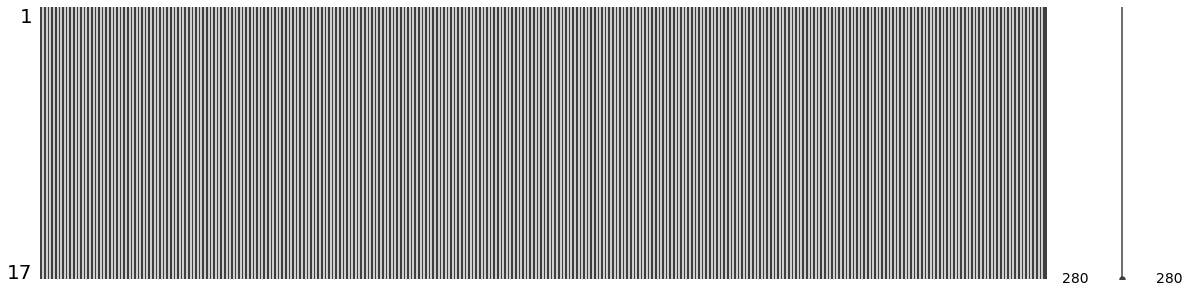

In [20]:
mno.matrix(deter_data, figsize = (20,5))

In [22]:
deter_data.to_csv('output_wide.csv', encoding = 'utf-8-sig') 
files.download('output_wide.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [38]:
output_wide = pd.read_csv('output_wide.csv', sep = ';')

In [39]:
output_wide.groupby("Group").describe()["Speed (m/s)"]

,count,mean,std,min,25%,50%,75%,max
Group,,,,,,,,
20min,17.0,0.715159,0.223616,0.424372,0.602055,0.636828,0.731885,1.381092
40min,17.0,0.807906,0.191824,0.609848,0.694765,0.758246,0.827296,1.278270
60min,17.0,0.929920,0.241455,0.594612,0.757860,0.886349,1.069672,1.601109
80min,17.0,0.948232,0.271075,0.675777,0.767868,0.862981,1.144979,1.547493
OFF,17.0,0.555042,0.268164,0.000000,0.478769,0.544025,0.717643,0.967739


[Text(0, 0, 'OFF'),
 Text(0, 0, '20 min'),
 Text(0, 0, '40 min'),
 Text(0, 0, '60 min'),
 Text(0, 0, '80 min')]

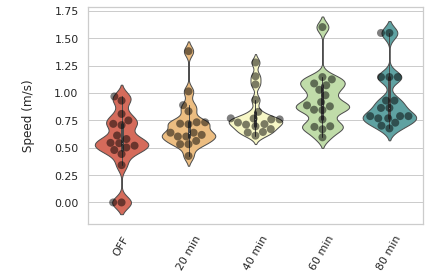

In [40]:
sns.set(style="whitegrid")
ax = sns.violinplot(x="Group", y="Speed (m/s)", data=output_wide, palette="Spectral", linewidth = 1, alpha = 10, scale="width", bw=0.2, cut=2)

sns.swarmplot(y = "Speed (m/s)", 
                x = "Group", 
                data = output_wide, 
                   color = "black", edgecolor = "black", size = 8, alpha = 0.5)

ax.set(xlabel=None)
ax.set(ylabel="\n Speed (m/s) \n")
ax.set_xticklabels(ax.get_xticklabels(),rotation = 60)

ax.set_xticklabels(['OFF', '20 min', '40 min', '60 min', '80 min'])

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 11.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


[Text(0, 0, 'OFF'),
 Text(0, 0, '20 min'),
 Text(0, 0, '40 min'),
 Text(0, 0, '60 min'),
 Text(0, 0, '80 min')]

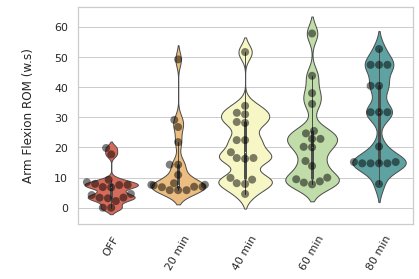

In [41]:
sns.set(style="whitegrid")
ax = sns.violinplot(x="Group", y="arm_flex_rom_worstside", data=output_wide, palette="Spectral", linewidth = 1, alpha = 10, scale="width", bw=0.2, cut=2)

sns.swarmplot(y = "arm_flex_rom_worstside", 
                x = "Group", 
                data = output_wide, 
                   color = "black", edgecolor = "black", size = 8, alpha = 0.5)

ax.set(xlabel=None)
ax.set(ylabel="\n Arm Flexion ROM (w.s) \n")
ax.set_xticklabels(ax.get_xticklabels(),rotation = 60)

ax.set_xticklabels(['OFF', '20 min', '40 min', '60 min', '80 min'])

In [42]:
pg.friedman(data=output_wide, dv="arm_flex_rom_worstside", within="Group", subject="patient")

,Source,W,ddof1,Q,p-unc
Friedman,Group,0.561938,4,38.211765,1.013314e-07


In [30]:
sp.posthoc_conover_friedman(a=output_wide, y_col="arm_flex_rom_worstside", group_col="Group", block_col="patient", p_adjust="fdr_bh", melted=True)

,OFF,20min,40min,60min,80min
OFF,1.000000,0.320043,0.002134,0.000147,0.000062
20min,0.320043,1.000000,0.035828,0.002134,0.000898
40min,0.002134,0.035828,1.000000,0.320043,0.197947
60min,0.000147,0.002134,0.320043,1.000000,0.669699
80min,0.000062,0.000898,0.197947,0.669699,1.000000


/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 11.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 5.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 17.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


[Text(0, 0, 'OFF'),
 Text(0, 0, '20 min'),
 Text(0, 0, '40 min'),
 Text(0, 0, '60 min'),
 Text(0, 0, '80 min')]

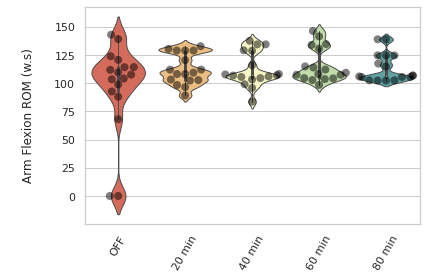

In [45]:
sns.set(style="whitegrid")
ax = sns.violinplot(x="Group", y="Cadence (steps/min)", data=output_wide, palette="Spectral", linewidth = 1, alpha = 10, scale="width", bw=0.2, cut=2)

sns.swarmplot(y = "Cadence (steps/min)", 
                x = "Group", 
                data = output_wide, 
                   color = "black", edgecolor = "black", size = 8, alpha = 0.5)

ax.set(xlabel=None)
ax.set(ylabel="\n Arm Flexion ROM (w.s) \n")
ax.set_xticklabels(ax.get_xticklabels(),rotation = 60)

ax.set_xticklabels(['OFF', '20 min', '40 min', '60 min', '80 min'])

In [43]:
pg.friedman(data=output_wide, dv="Cadence (steps/min)", within="Group", subject="patient")

,Source,W,ddof1,Q,p-unc
Friedman,Group,0.035986,4,2.447059,0.65414


In [44]:
sp.posthoc_conover_friedman(a=output_wide, y_col="Cadence (steps/min)", group_col="Group", block_col="patient", p_adjust="fdr_bh", melted=True)

,OFF,20min,40min,60min,80min
OFF,1.000000,1.000000,1.000000,0.720097,1.000000
20min,1.000000,1.000000,1.000000,0.720097,1.000000
40min,1.000000,1.000000,1.000000,0.720097,1.000000
60min,0.720097,0.720097,0.720097,1.000000,0.720097
80min,1.000000,1.000000,1.000000,0.720097,1.000000


[Text(0, 0, 'OFF'),
 Text(0, 0, '20 min'),
 Text(0, 0, '40 min'),
 Text(0, 0, '60 min'),
 Text(0, 0, '80 min')]

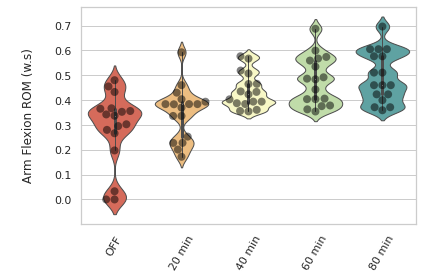

In [47]:
sns.set(style="whitegrid")
ax = sns.violinplot(x="Group", y="Step Length - worst side (m)2", data=output_wide, palette="Spectral", linewidth = 1, alpha = 10, scale="width", bw=0.2, cut=2)

sns.swarmplot(y = "Step Length - worst side (m)2", 
                x = "Group", 
                data = output_wide, 
                   color = "black", edgecolor = "black", size = 8, alpha = 0.5)

ax.set(xlabel=None)
ax.set(ylabel="\n Arm Flexion ROM (w.s) \n")
ax.set_xticklabels(ax.get_xticklabels(),rotation = 60)

ax.set_xticklabels(['OFF', '20 min', '40 min', '60 min', '80 min'])

In [46]:

sp.posthoc_conover_friedman(a=output_wide, y_col="Step Length - worst side (m)2", group_col="Group", block_col="patient", p_adjust="fdr_bh", melted=True)

,OFF,20min,40min,60min,80min
OFF,1.000000,0.831019,0.015652,0.000471,0.000303
20min,0.831019,1.000000,0.010431,0.000303,0.000294
40min,0.015652,0.010431,1.000000,0.254014,0.161392
60min,0.000471,0.000303,0.254014,1.000000,0.831019
80min,0.000303,0.000294,0.161392,0.831019,1.000000
